<h1 style="color:#159364; font-family:verdana;"> <center>Decoding Resume Attributes for Job Callbacks</center> </h1>

<div class="alert alert-block alert-info" style="background-color:#b7f7c8; font-size:15px; font-family:verdana;">
This experiment data comes from a study that sought to understand the influence of race and gender on job application callback rates. The study monitored job postings in Boston and Chicago for several months during 2001 and 2002 and used this to build up a set of test cases. Over this time period, the researchers randomly generating resumes to go out to a job posting, such as years of experience and education details, to create a realistic-looking resume. They then randomly assigned a name to the resume that would communicate the applicant's gender and race. The first names chosen for the study were selected so that the names would predominantly be recognized as belonging to black or white individuals. For example, Lakisha was a name that their survey indicated would be interpreted as a black woman, while Greg was a name that would generally be interpreted to be associated with a white male.
</div
    
 A data frame with 4870 observations, representing 4870 resumes, over 30 different variables that describe the job details, the outcome (received_callback), and attributes of the resume.
    
| Column | Description |
| --- | --- |
| job_ad_id | Unique ID associated with the advertisement. |
| job_city | City where the job was located. |
| job_industry | Industry of the job. |
| job_type | Type of role. |
| job_fed_contractor | Indicator for if the employer is a federal contractor. |
| job_equal_opp_employer | Indicator for if the employer is an Equal Opportunity Employer. |
| job_ownership | The type of company, e.g. a nonprofit or a private company. |
| job_req_any | Indicator for if any job requirements are listed. If so, the other job_req_* fields give more detail. |
| job_req_communication | Indicator for if communication skills are required. |
| job_req_education | Indicator for if some level of education is required. |
| job_req_min_experience | Amount of experience required. |
| job_req_computer | Indicator for if computer skills are required. |
| job_req_organization | Indicator for if organization skills are required. |
| job_req_school | Level of education required. |
| received_callback | Indicator for if there was a callback from the job posting for the person listed on this resume. |
| firstname | The first name used on the resume. |
| race | Inferred race associated with the first name on the resume. |
| gender | Inferred gender associated with the first name on the resume. |
| years_college | Years of college education listed on the resume. |
| college_degree | Indicator for if the resume listed a college degree. |
| honors | Indicator for if the resume listed that the candidate has been awarded some honors. |
| worked_during_school | Indicator for if the resume listed working while in school. |
| years_experience | Years of experience listed on the resume. |
| computer_skills | Indicator for if computer skills were listed on the resume. These skills were adapted for listings, though the skills were assigned independently of other details on the resume. |
| special_skills | Indicator for if any special skills were listed on the resume. |
| volunteer | Indicator for if volunteering was listed on the resume. |
| military | Indicator for if military experience was listed on the resume. |
| employment_holes | Indicator for if there were holes in the person's employment history. |
| has_email_address | Indicator for if the resume lists an email address. |
| resume_quality | Each resume was generally classified as either lower or higher quality. |



In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/which-resume-attributes-drive-job-callbacks/resume.csv


# Data Overview

In [3]:
df = pd.read_csv('/kaggle/input/which-resume-attributes-drive-job-callbacks/resume.csv')
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


# Data Shape

In [4]:
print('There are', df.shape[0], 'rows and', df.shape[1],'columns.')

There are 4870 rows and 30 columns.


# Data Summary statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_ad_id,4870.0,651.777823,388.690698,1.0,306.25,647.0,979.75,1344.0
job_fed_contractor,3102.0,0.114765,0.318789,0.0,0.00,0.0,0.00,1.0
job_equal_opp_employer,4870.0,0.291170,0.454349,0.0,0.00,0.0,1.00,1.0
job_req_any,4870.0,0.787269,0.409281,0.0,1.00,1.0,1.00,1.0
job_req_communication,4870.0,0.124846,0.330578,0.0,0.00,0.0,0.00,1.0
job_req_education,4870.0,0.106776,0.308860,0.0,0.00,0.0,0.00,1.0
job_req_computer,4870.0,0.437166,0.496087,0.0,0.00,0.0,1.00,1.0
job_req_organization,4870.0,0.072690,0.259654,0.0,0.00,0.0,0.00,1.0
received_callback,4870.0,0.080493,0.272083,0.0,0.00,0.0,0.00,1.0
years_college,4870.0,3.618480,0.714997,0.0,3.00,4.0,4.00,4.0


# Callback Rates by Race and Gender

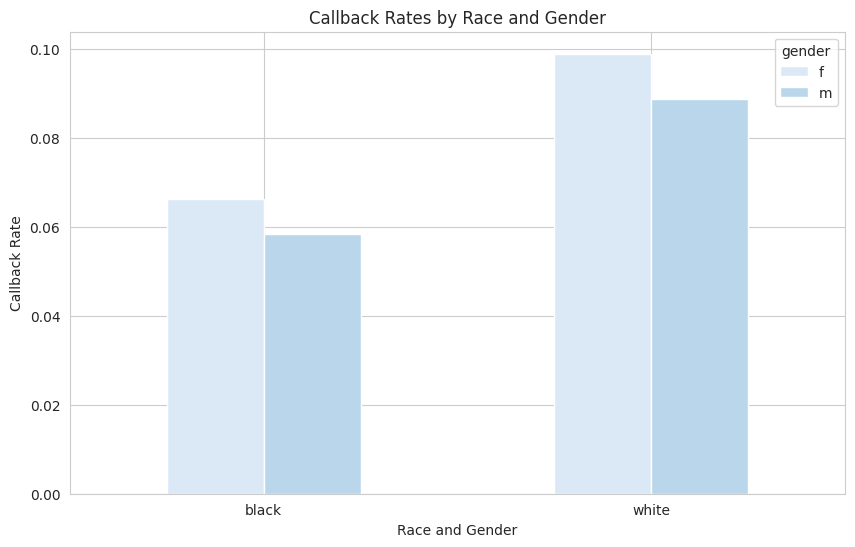

In [6]:
callback_rates = df.groupby(['race', 'gender'])['received_callback'].mean().unstack()
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
callback_rates.plot(kind='bar', ax=ax, color=sns.color_palette("Blues"))

ax.set_xlabel('Race and Gender')
ax.set_ylabel('Callback Rate')
ax.set_title('Callback Rates by Race and Gender')
plt.xticks(rotation=0)

plt.show()

# Analyzing callback rates across job attributes

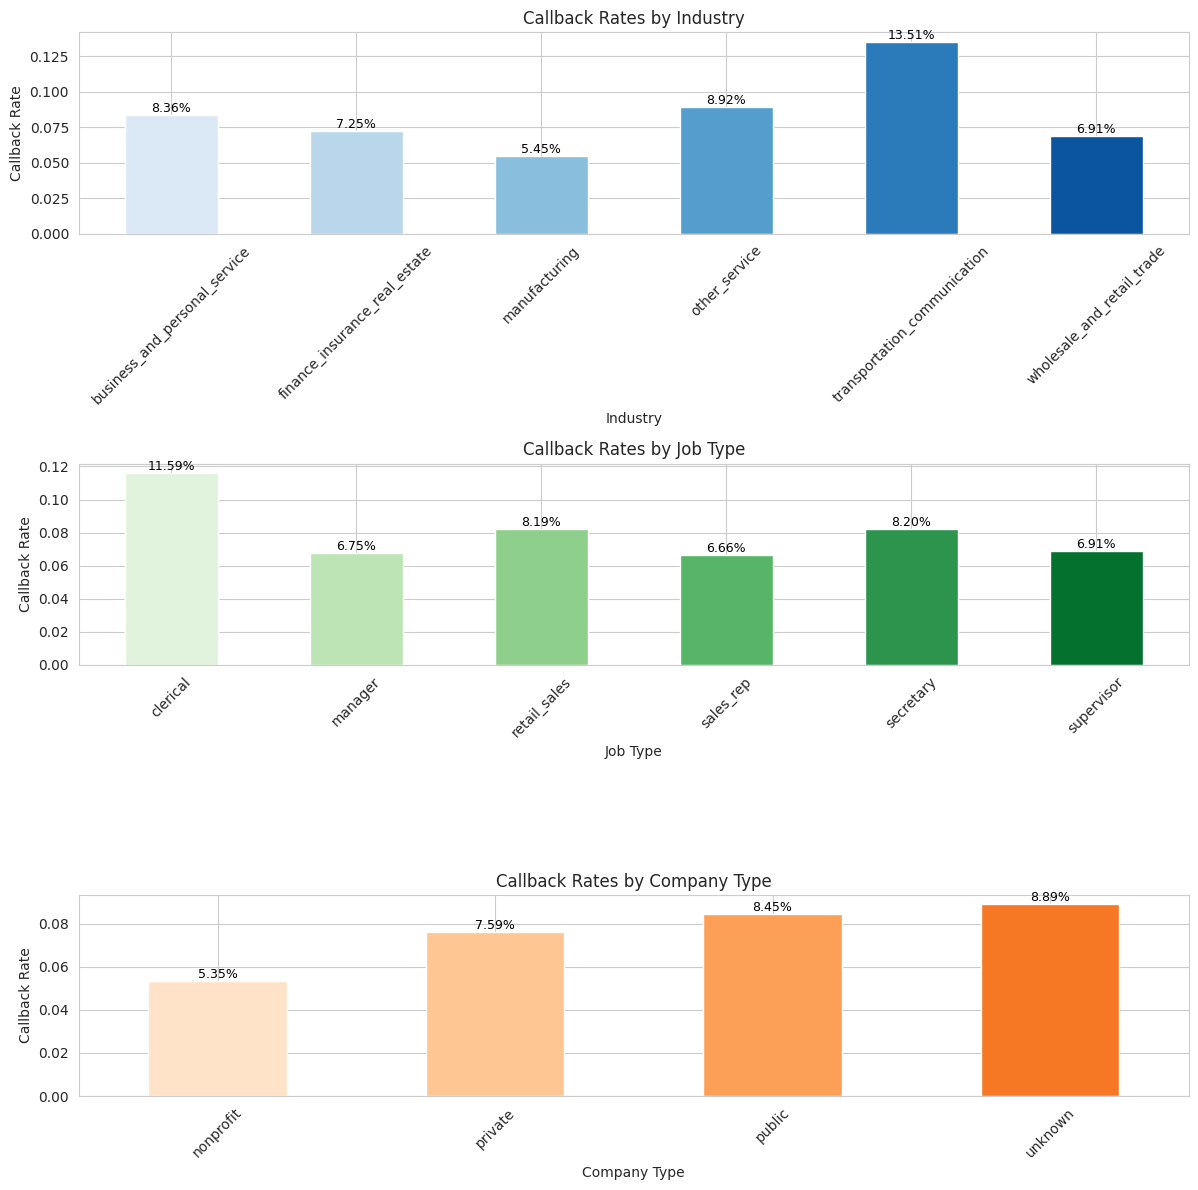

In [7]:
callback_rates_industry = df.groupby('job_industry')['received_callback'].mean()
callback_rates_job_type = df.groupby('job_type')['received_callback'].mean()
callback_rates_company_type = df.groupby('job_ownership')['received_callback'].mean()

sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
callback_rates_industry.plot(kind='bar', ax=axes[0], color=sns.color_palette("Blues"))
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Callback Rate')
axes[0].set_title('Callback Rates by Industry')
axes[0].tick_params(axis='x', rotation=45)


callback_rates_job_type.plot(kind='bar', ax=axes[1], color=sns.color_palette("Greens"))
axes[1].set_xlabel('Job Type')
axes[1].set_ylabel('Callback Rate')
axes[1].set_title('Callback Rates by Job Type')
axes[1].tick_params(axis='x', rotation=45)

callback_rates_company_type.plot(kind='bar', ax=axes[2], color=sns.color_palette("Oranges"))
axes[2].set_xlabel('Company Type')
axes[2].set_ylabel('Callback Rate')
axes[2].set_title('Callback Rates by Company Type')
axes[2].tick_params(axis='x', rotation=45)

def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', color='black', fontsize=9)

add_value_labels(axes[0])
add_value_labels(axes[1])
add_value_labels(axes[2])

plt.tight_layout()
plt.show()

# Distribution of job attributes

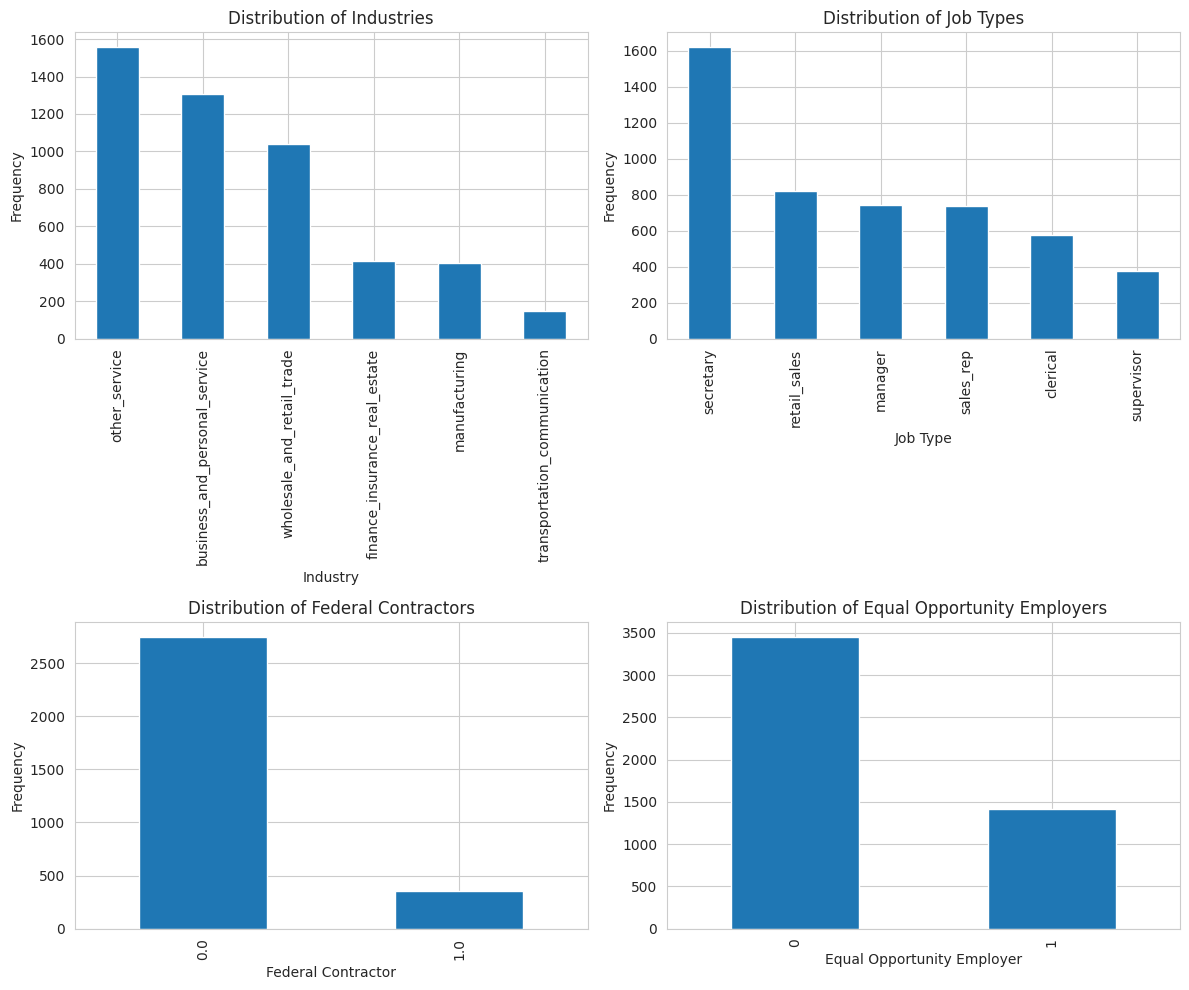

In [8]:
industry_counts = df['job_industry'].value_counts()
job_type_counts = df['job_type'].value_counts()
fed_contractor_counts = df['job_fed_contractor'].value_counts()
equal_opp_employer_counts = df['job_equal_opp_employer'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

industry_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Industry')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Industries')

job_type_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Job Type')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Job Types')

fed_contractor_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Federal Contractor')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Federal Contractors')

equal_opp_employer_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Equal Opportunity Employer')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Equal Opportunity Employers')

plt.tight_layout()
plt.show()

# Relationship between attributes and callback rates

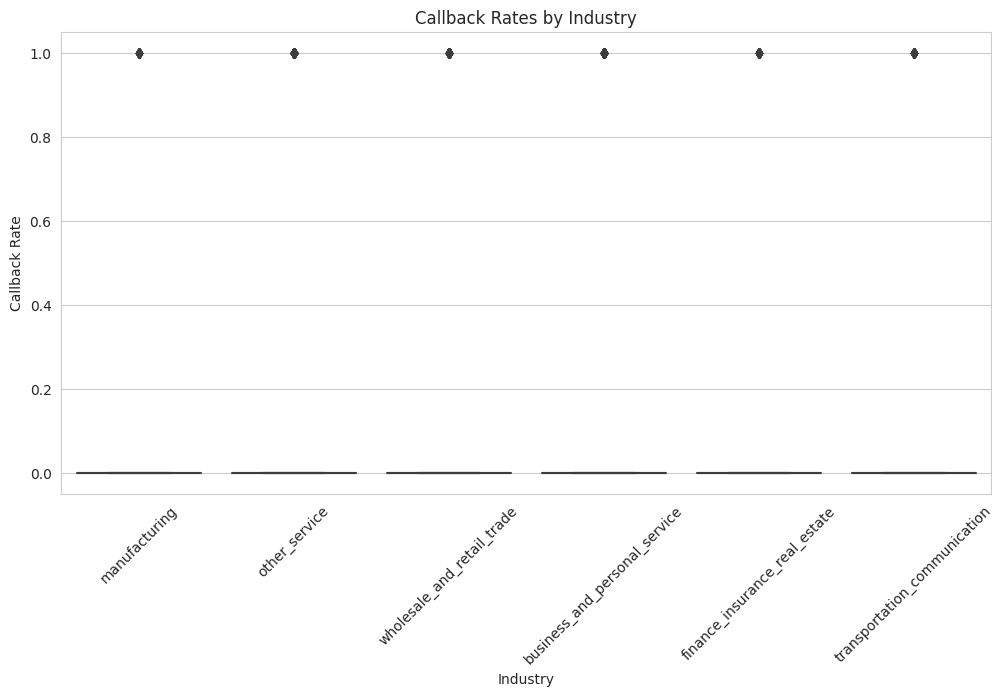

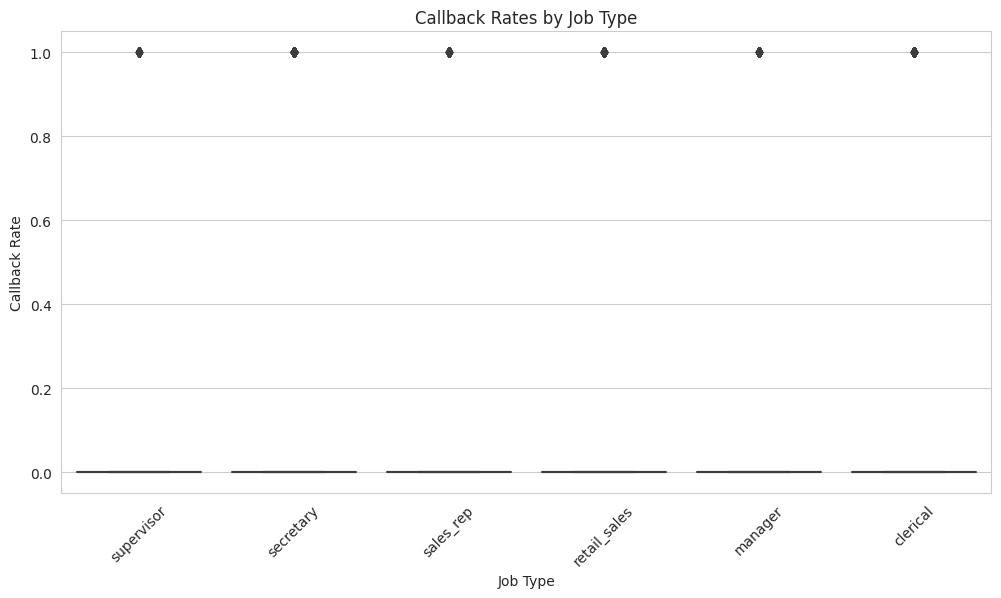

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['job_industry'], y=df['received_callback'])
plt.xlabel('Industry')
plt.ylabel('Callback Rate')
plt.title('Callback Rates by Industry')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['job_type'], y=df['received_callback'])
plt.xlabel('Job Type')
plt.ylabel('Callback Rate')
plt.title('Callback Rates by Job Type')
plt.xticks(rotation=45)
plt.show()

# Racial and Gender distribution

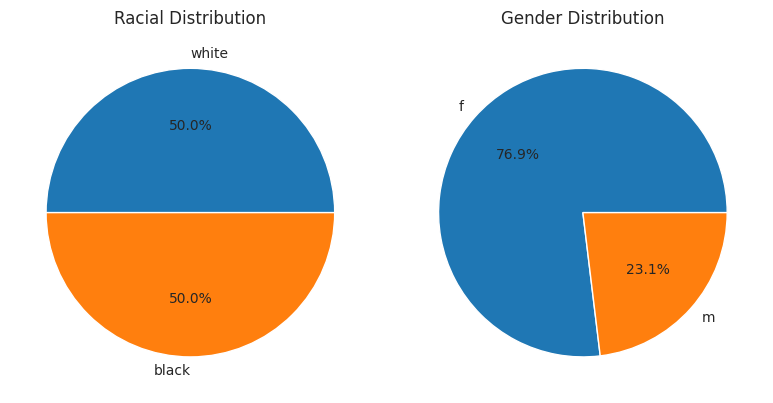

In [10]:
# Calculate the proportions of racial groups
racial_proportions = df['race'].value_counts(normalize=True) * 100

# Calculate the proportions of racial groups
racial_proportions = df['race'].value_counts(normalize=True) * 100

# Calculate the proportions of gender groups
gender_proportions = df['gender'].value_counts(normalize=True) * 100

# Create subplots for racial and gender distribution
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot racial distribution as a pie chart
axes[0].pie(racial_proportions.values, labels=racial_proportions.index, autopct='%1.1f%%')
axes[0].set_title('Racial Distribution')

# Plot gender distribution as a pie chart
axes[1].pie(gender_proportions.values, labels=gender_proportions.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Investigating resume characteristics

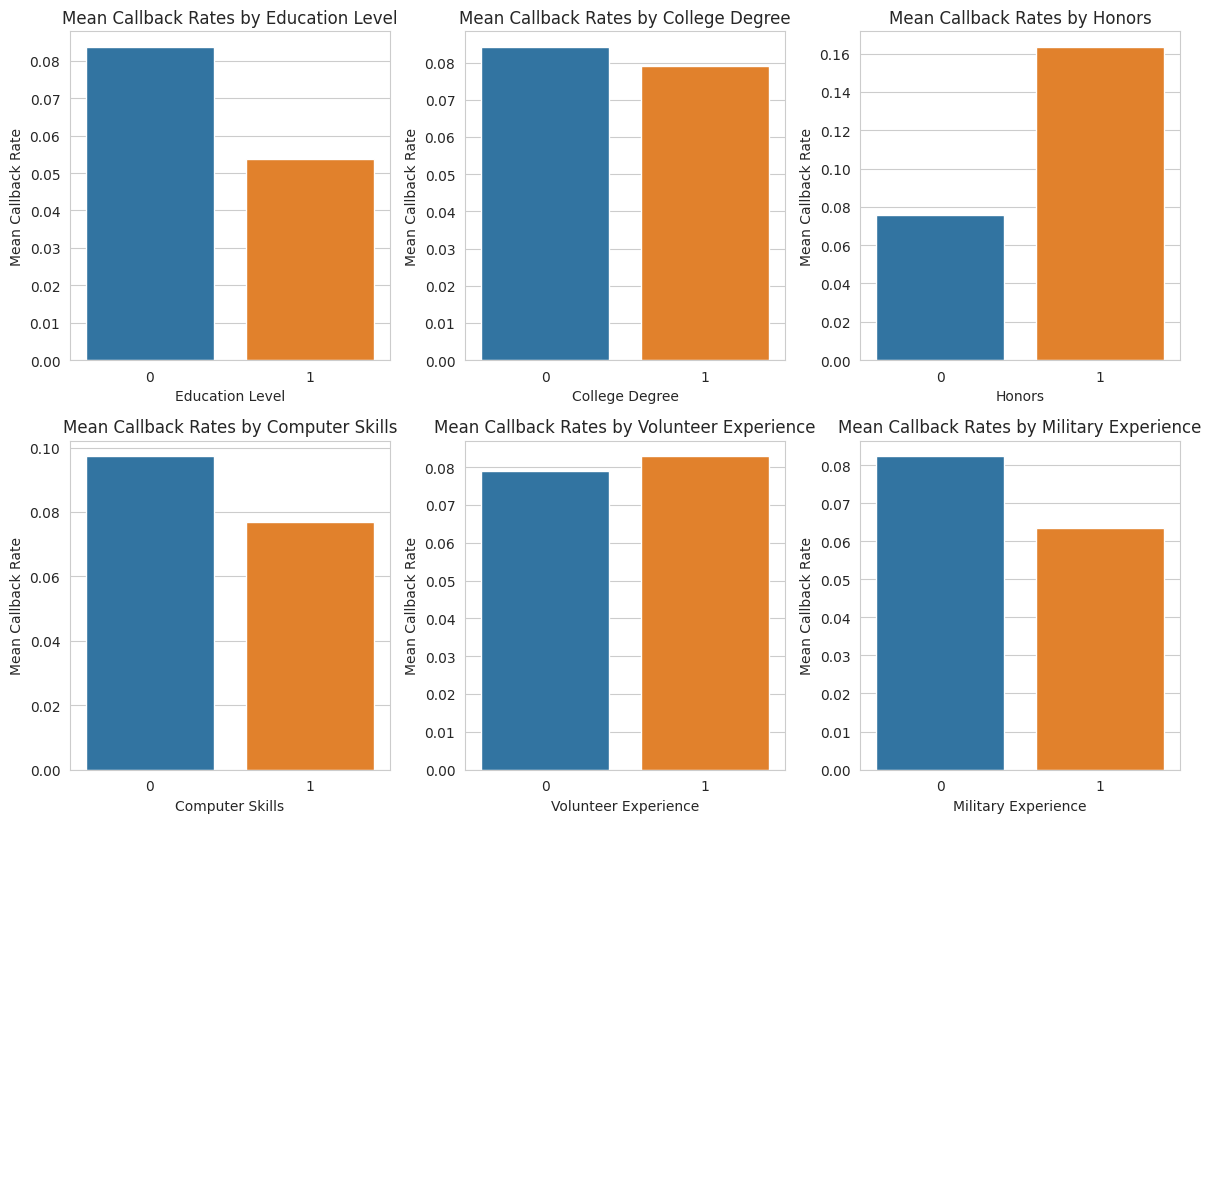

In [11]:
# Calculate mean callback rate by education level
callback_rates_education = df.groupby('job_req_education')['received_callback'].mean().reset_index()

# Calculate mean callback rate by college degree
callback_rates_degree = df.groupby('college_degree')['received_callback'].mean().reset_index()

# Calculate mean callback rate by honors
callback_rates_honors = df.groupby('honors')['received_callback'].mean().reset_index()

# Calculate mean callback rate by computer skills
callback_rates_computer = df.groupby('computer_skills')['received_callback'].mean().reset_index()

# Calculate mean callback rate by volunteer experience
callback_rates_volunteer = df.groupby('volunteer')['received_callback'].mean().reset_index()

# Calculate mean callback rate by military experience
callback_rates_military = df.groupby('military')['received_callback'].mean().reset_index()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Plot 1 - Education Level
sns.barplot(x='job_req_education', y='received_callback', data=callback_rates_education, ax=axes[0, 0])
axes[0, 0].set_xlabel('Education Level')
axes[0, 0].set_ylabel('Mean Callback Rate')
axes[0, 0].set_title('Mean Callback Rates by Education Level')

# Plot 2 - College Degree
sns.barplot(x='college_degree', y='received_callback', data=callback_rates_degree, ax=axes[0, 1])
axes[0, 1].set_xlabel('College Degree')
axes[0, 1].set_ylabel('Mean Callback Rate')
axes[0, 1].set_title('Mean Callback Rates by College Degree')

# Plot 3 - Honors
sns.barplot(x='honors', y='received_callback', data=callback_rates_honors, ax=axes[0, 2])
axes[0, 2].set_xlabel('Honors')
axes[0, 2].set_ylabel('Mean Callback Rate')
axes[0, 2].set_title('Mean Callback Rates by Honors')

# Plot 4 - Computer Skills
sns.barplot(x='computer_skills', y='received_callback', data=callback_rates_computer, ax=axes[1, 0])
axes[1, 0].set_xlabel('Computer Skills')
axes[1, 0].set_ylabel('Mean Callback Rate')
axes[1, 0].set_title('Mean Callback Rates by Computer Skills')

# Plot 5 - Volunteer Experience
sns.barplot(x='volunteer', y='received_callback', data=callback_rates_volunteer, ax=axes[1, 1])
axes[1, 1].set_xlabel('Volunteer Experience')
axes[1, 1].set_ylabel('Mean Callback Rate')
axes[1, 1].set_title('Mean Callback Rates by Volunteer Experience')

# Plot 6 - Military Experience
sns.barplot(x='military', y='received_callback', data=callback_rates_military, ax=axes[1, 2])
axes[1, 2].set_xlabel('Military Experience')
axes[1, 2].set_ylabel('Mean Callback Rate')
axes[1, 2].set_title('Mean Callback Rates by Military Experience')

# Remove empty subplots
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust subplot spacing and alignment
plt.tight_layout()

# Show the plots
plt.show()
